In [7]:
import json as json
import matplotlib.pyplot as plt
import os
import numpy as np

import multifil
import treatment_definitions as td
import graphing_utilities as gutil

# List valid things that can be changed
print("valid constant (phenotype) parameters\n", multifil.hs.hs.VALID_PARAMS)

valid constant (phenotype) parameters
 ['mf_k', 'mh_c_ks', 'mh_c_kw', 'mh_c_rs', 'mh_c_rw', 'mh_g_ks', 'mh_g_kw', 'mh_g_rs', 'mh_g_rw', 'detachment_rate', 'mh_fd_k0', 'mh_fd_delta', 'mh_attachment_rate', 'mh_ps_rate', 'af_k', 'ti_a', 'ti_b']


In [8]:
print(os.cpu_count())

4


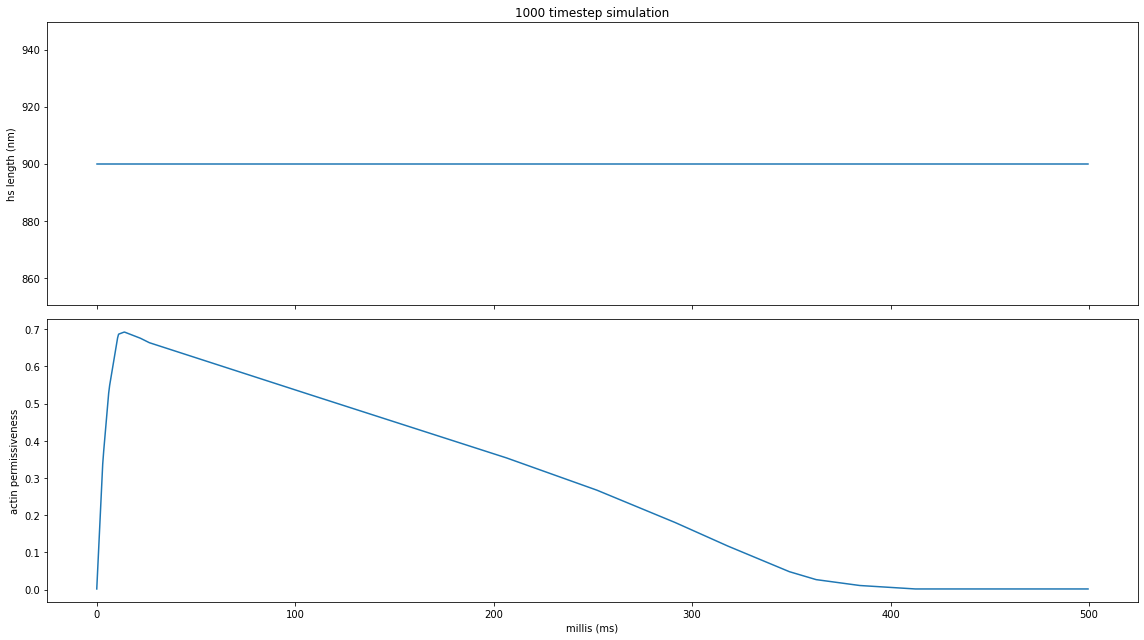

In [9]:
# Setup experiment, show the traces
time_trace, length_trace, ap_trace, _ = td.davis_t_spring()  # We only want the three traces, so we discard the last bit
# mh_c_rs_wt, mh_g_rs_wt = td.stepsize_to_tht_mag(step_size=7.8)
# print(mh_c_rs_wt, mh_g_rs_wt)
wildtype = True
if wildtype:
    # specify we want the force-sensitive detatchment rate
    comment = "WT"
    params = {'detachment_rate':'force_sensitive', 'mh_fd_k0':0.102, 'mh_fd_delta':1.3} #, 'mh_c_rs':mh_c_rs_wt, 'mh_g_rs':mh_g_rs_wt} # Wildtype
else:
    # Create mh isomer profile - P710R mechanics
    # mh_c_rs_mut, mh_g_rs_mut = td.stepsize_to_tht_mag(step_size=3.0)
    # print(mh_c_rs_mut, mh_g_rs_mut)
    comment = 'alpha_10'#"OM_fixed"
    params = {'mh_iso':[{'iso_p':0.9, 'detachment_rate':'force_sensitive', 'mh_fd_k0':0.102, 'mh_fd_delta':1.3},#, 'mh_c_rs':mh_c_rs_wt, 'mh_g_rs':mh_g_rs_wt},  # Wildtype
                        {'iso_p':0.1, 'detachment_rate':'force_sensitive', 'mh_fd_k0':0.204, 'mh_fd_delta':2.0, 'mh_attachment_rate':252},#, 'mh_c_rs':mh_c_rs_mut, 'mh_g_rs':mh_g_rs_mut}   # P710R, k0 originally 80
                       ]# P710R 'mh_fd_k0':0.087, 'mh_fd_delta':0.31
             }

#plot the traces
gutil.plot_input_traces(time_trace, length_trace, ap_trace)

#print the phenotype settings

In [10]:
"""This code runs a single simulation"""
output_dir = "../_output/force_sensitive/longer_sarcs/adjust_ps/"
os.makedirs(output_dir, exist_ok=True)

# check the comment to see what we are passing to it.
wl_meta = multifil.aws.metas.emit(
    path_local=output_dir,  # local dir to save run output to
    path_s3=None,  #s3 bucket to upload results to
    time=time_trace,
    poisson=0.0,  # poisson ratio, set to const lattice here
    ls=None,  # intial ls, using default by passing none
    z_line=length_trace, 
    actin_permissiveness=ap_trace,
    comment=comment,  # comment describing run
    hs_params=params,  # constants we want to alter - phenotype
    write=True,  # whether to write out resulting file or just pass back to variable
)

# determine where the metafile was saved.
run_name = wl_meta['name']
print(run_name)
run_file = output_dir + run_name + ".meta.json"

print(wl_meta['hs_params'])

run_manager = multifil.aws.run.manage(run_file, unattended=False) # have run.py create the sarc from meta
# Begin running
data, exit_code = run_manager.run_and_save()   # with our new sarc, run it, getting the data from it.

9996eda4-955e-11ea-8cc1-c49deda59ed1
{'detachment_rate': 'force_sensitive', 'mh_fd_k0': 0.102, 'mh_fd_delta': 1.3}

MainProcess finished timestep 1 of 1000, 0h1m23s left
MainProcess finished timestep 101 of 1000, 0h3m50s left
MainProcess finished timestep 201 of 1000, 0h3m31s left
MainProcess finished timestep 301 of 1000, 0h3m4s left
MainProcess finished timestep 401 of 1000, 0h2m39s left
MainProcess finished timestep 501 of 1000, 0h2m11s left
MainProcess finished timestep 601 of 1000, 0h1m44s left
MainProcess finished timestep 701 of 1000, 0h1m17s left
MainProcess finished timestep 801 of 1000, 0h0m53s left
MainProcess finished timestep 901 of 1000, 0h0m25s leftrun.py MainProcess # ## model finished, uploading
run.py MainProcess # ## uploading finished, done with this run


saved to: ../_output/force_sensitive/longer_sarcs/adjust_ps/\9996eda4-955e-11ea-8cc1-c49deda59ed1.png


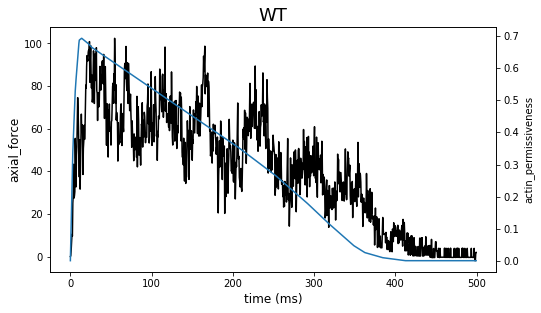

In [11]:
# graph the result
gutil.plot_data(data, title=comment, save_dir=output_dir)

In [12]:
gutil.print_constants(data['constants'])

ti
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
af
 	af_k = 1743 
 	af_k = 1743 
 	af_k = 1743 
 	af_k = 1743 
 	af_k = 1743 
 	af_k = 1743 
 	af_k = 1743 
 	af_k = 1743 
mf
 	mf_k = 2020 
 	mf_k = 2020 
 	mf_k = 2020 
 	mf_k = 2020 
mh


 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_rate = 72 mh_ps_rate = 0.1 , 	 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_rate = 72 mh_ps_rate = 0.1 , 	 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_rate = 72 mh_ps_rate = 0.1 , 	 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_rate = 72 

 = force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_rate = 72 mh_ps_rate = 0.1 , 	 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_rate = 72 mh_ps_rate = 0.1 , 	 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_rate = 72 mh_ps_rate = 0.1 , 	 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_rate = 72 mh_ps_rate = 0.1 , 	 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 1

 = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_rate = 72 mh_ps_rate = 0.1 , 	 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_rate = 72 mh_ps_rate = 0.1 , 	 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_rate = 72 mh_ps_rate = 0.1 , 	 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_rate = 72 mh_ps_rate = 0.1 , 	 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230

 0.1 , 	 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_rate = 72 mh_ps_rate = 0.1 , 	 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_rate = 72 mh_ps_rate = 0.1 , 	 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_rate = 72 mh_ps_rate = 0.1 , 	 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_ra

= force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_rate = 72 mh_ps_rate = 0.1 , 	 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_rate = 72 mh_ps_rate = 0.1 , 	 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_rate = 72 mh_ps_rate = 0.1 , 	 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.102 mh_fd_delta = 1.3 mh_attachment_rate = 72 mh_ps_rate = 0.1 , 	 	mh_c_ks = 40 mh_c_kw = 40 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16